In [23]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import cv2
import os
import re
import numpy as np
import pathlib
from matplotlib import pyplot as plt

In [4]:
!nvidia-smi

Mon Jul  8 15:23:01 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.105.01   Driver Version: 515.105.01   CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 30%   28C    P8    24W / 320W |    290MiB / 10240MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [40]:
def imshow(img, figsize=(10, 8)):
    """
        show opencv image
    """
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image using matplotlib
    plt.figure(figsize=figsize)  # Adjust the size as needed

    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axis
    plt.show()

In [11]:
print("Loading model...")
model_type = 'vit_h'
checkpoint = '/home/meng2024/jackyyeh/segment-anything/model_checkpoint/sam_vit_h_4b8939.pth'
sam = sam_model_registry[model_type](checkpoint=checkpoint)
_ = sam.to(device="cuda")
# output_mode = "coco_rle" if args.convert_to_rle else "binary_mask"
# amg_kwargs = get_amg_kwargs(args)
generator = SamAutomaticMaskGenerator(sam)

Loading model...


In [44]:
import numpy as np
from typing import Any, Dict, List
def get_mask(img, masks: List[Dict[str, Any]]) -> None:
    header = "id,area,bbox_x0,bbox_y0,bbox_w,bbox_h,point_input_x,point_input_y,predicted_iou,stability_score,crop_box_x0,crop_box_y0,crop_box_w,crop_box_h"  # noqa
    metadata = [header]
    height, width, _ = img.shape
    canvas = np.zeros((height, width, 3), dtype=img.dtype)
    for i, mask_data in enumerate(masks):
        mask = mask_data["segmentation"]
        filename = f"{i}.png"
        
        color = np.random.random((1, 3))[0] * 255
        color = color.astype(np.int8)
        canvas[mask > 0, :] = color
    
    # out_img = cv2.hconcat((img, canvas))
    return canvas

def get_mask(img, masks: List[Dict[str, Any]], target_pt) -> None:
    header = "id,area,bbox_x0,bbox_y0,bbox_w,bbox_h,point_input_x,point_input_y,predicted_iou,stability_score,crop_box_x0,crop_box_y0,crop_box_w,crop_box_h"  # noqa
    metadata = [header]
    height, width, _ = img.shape
    canvas = np.zeros((height, width, 3), dtype=img.dtype)

    target_mask = None
    for i, mask_data in enumerate(masks):
        mask = mask_data["segmentation"]
        filename = f"{i}.png"
        
        color = np.random.random((1, 3))[0] * 255
        color = color.astype(np.int8)
        canvas[mask > 0, :] = color

        x, y = target_pt
        if mask[y][x]:
            target_mask = mask.copy()
        
    # out_img = cv2.hconcat((img, canvas))
    return canvas, target_mask


In [15]:
""" 
    rgb_ts_2021_11_09_16h15m31s_000002.tif,rgb_ts_2021_11_15_13h01m47s_000742.tif,424,240,"[0,126,104,1,151,41,0];[0,17,130,0,114,224,0];[1,396,201,1,253,207,0]"
"""

# ROOT = '/Users/jackyyeh/SideProjects/Traversability-Estimation/W-RIZZ'
ROOT = '/home/meng2024/jackyyeh/W-RIZZ'
LABEL_PATH = os.path.join(ROOT, 'data/wayfast/train_labels.csv')
IMG_ROOT = os.path.join(ROOT, 'data/wayfast/rgb')
OUTPUT_DIR = os.path.join(ROOT, 'data/wayfast/sam_train_labels.csv')

cnt = 0
with open(LABEL_PATH, 'r') as f:
    f.readline()
    line = f.readline()
    line = line.strip()
    data = line.split(',')
    img_path1, img_path2, width, height = data[:4]
    
    img_path1 = os.path.join(IMG_ROOT, img_path1)
    img_path2 = os.path.join(IMG_ROOT, img_path2)
    
    print ('img_path1:', img_path1)
    print ('img_path2:', img_path2)
    img1 = cv2.imread(img_path1)
    img2 = cv2.imread(img_path2)

img_path1: /home/meng2024/jackyyeh/W-RIZZ/data/wayfast/rgb/rgb_ts_2021_11_09_16h15m31s_000002.tif
img_path2: /home/meng2024/jackyyeh/W-RIZZ/data/wayfast/rgb/rgb_ts_2021_11_15_13h01m47s_000742.tif


In [19]:
# tmp
masks = generator.generate(img1)

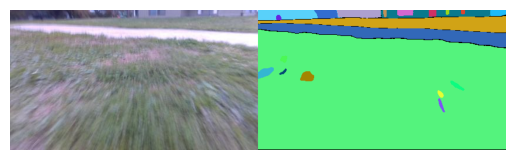

In [26]:
out_img = get_mask(img1, masks)
imshow(img1)

img_path1: /home/meng2024/jackyyeh/W-RIZZ/data/wayfast/rgb/rgb_ts_2021_11_09_16h15m31s_000002.tif
img_path2: /home/meng2024/jackyyeh/W-RIZZ/data/wayfast/rgb/rgb_ts_2021_11_15_13h01m47s_000742.tif


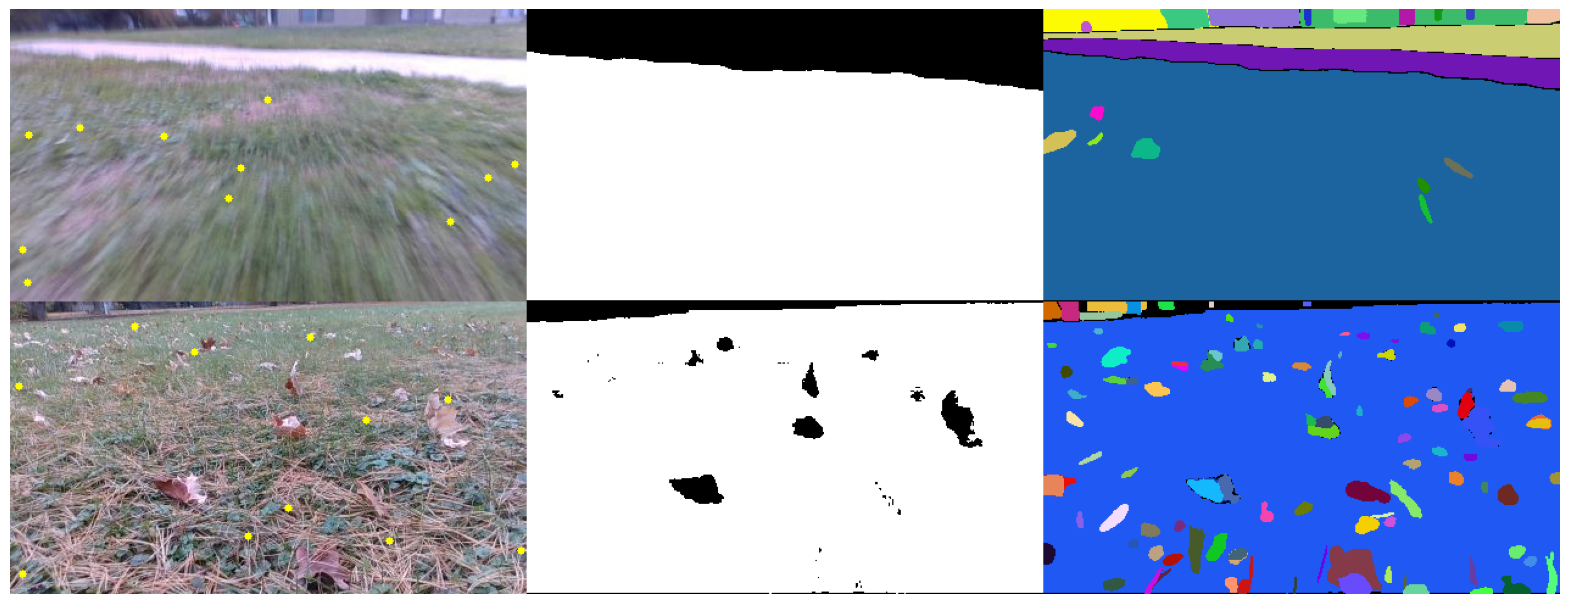

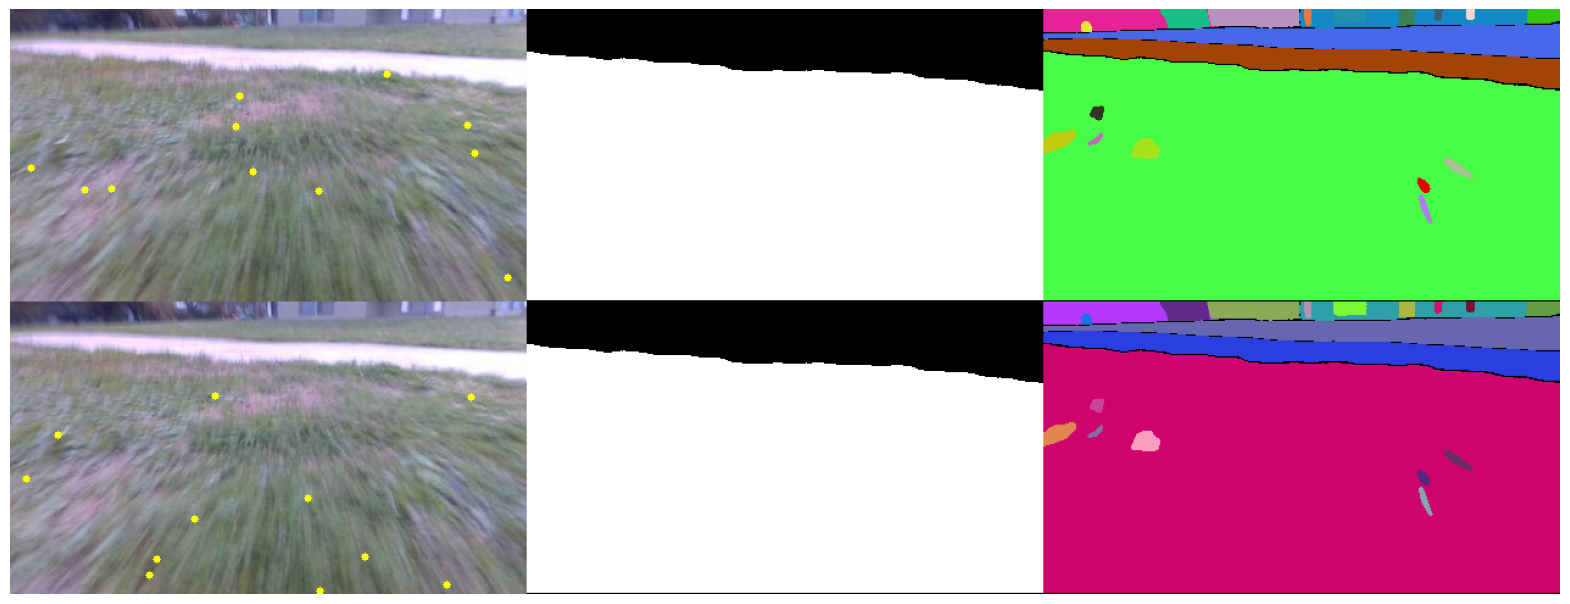

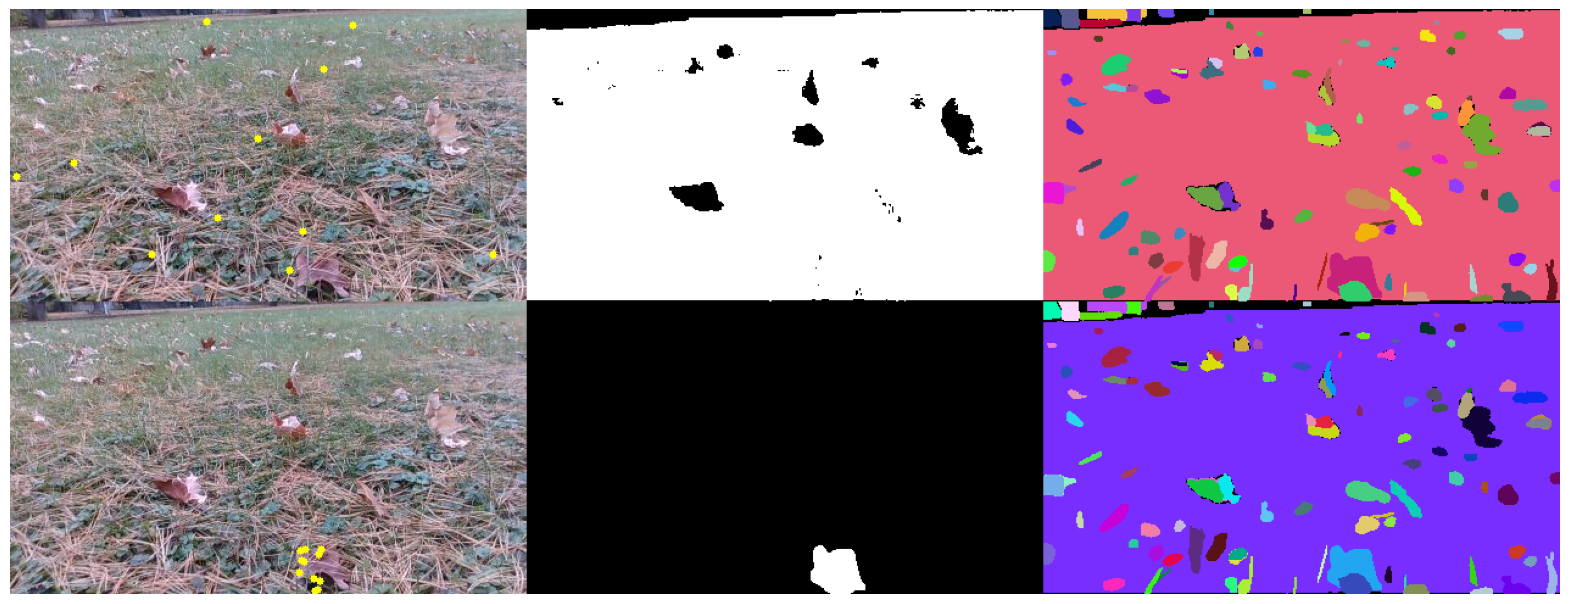

In [84]:

""" 
    rgb_ts_2021_11_09_16h15m31s_000002.tif,rgb_ts_2021_11_15_13h01m47s_000742.tif,424,240,"[0,126,104,1,151,41,0];[0,17,130,0,114,224,0];[1,396,201,1,253,207,0]"
"""

# ROOT = '/Users/jackyyeh/SideProjects/Traversability-Estimation/W-RIZZ'
ROOT = '/home/meng2024/jackyyeh/W-RIZZ'
LABEL_PATH = os.path.join(ROOT, 'data/wayfast/train_labels.csv')
IMG_ROOT = os.path.join(ROOT, 'data/wayfast/rgb')
OUTPUT_DIR = os.path.join(ROOT, 'data/wayfast/sam_train_labels.csv')

cnt = 0
with open(LABEL_PATH, 'r') as f:
    f.readline()
    for line in f.readlines():
        line = line.strip()
        data = line.split(',')
        img_path1, img_path2, width, height = data[:4]
        
        img_path1 = os.path.join(IMG_ROOT, img_path1)
        img_path2 = os.path.join(IMG_ROOT, img_path2)
        
        if not os.path.isfile(img_path1) or not os.path.isfile(img_path2):
            continue
        
        print ('img_path1:', img_path1)
        print ('img_path2:', img_path2)
        img1 = cv2.imread(img_path1)
        img2 = cv2.imread(img_path2)
        
        annots = ','.join(data[4:])
        annot_list = annots.split(';')
        
        """ 
            ex: "[0,126,104,1,151,41,0] -> 0,126,104,1,151,41,0
            
            
            ### definition of annotation (from dataset.py) ###
            for a in annotation_str.split(';'):
                l = [int(s) for s in a[1:-1].split(',')]
                scale_x = self._resolution[1] / width
                scale_y = self._resolution[0] / height
                # l[-1] == 0 => eq; l[-1] == 1 => latter is more; l[-1] == -1 => former is more
                annotations.append((
                    # ensure that annotations are properly resized to desired resolution
                    l[0], # 0 if pt1 is in imgA, 1 if it's in imgB
                    max(0, min(round(scale_x * l[1]), self._resolution[1]-1)),
                    max(0, min(round(scale_y * l[2]), self._resolution[0]-1)),
                    l[3], # 0 if pt2 is in imgA, 1 if it's in imgB
                    max(0, min(round(scale_x * l[4]), self._resolution[1]-1)),
                    max(0, min(round(scale_y * l[5]), self._resolution[0]-1)),
                    l[6]
                ))
        """
        # remove certain characters
        pattern = r'[\"\[\]]' 
        sam_masks1 = generator.generate(img1)
        sam_masks2 = generator.generate(img2)
        for i, annot in enumerate(annot_list):
            re_annot = re.sub(pattern, '', annot)
            label1, img1_w, img1_h, label2, img2_w, img2_h, relation = re_annot.split(',')
            
            # print ('label1:', label1)
            # print ('img1_w:', img1_w)
            # print ('img1_h:', img1_h)
            # print ('label2:', label2)
            # print ('img2_w:', img2_w)
            # print ('img2_h:', img2_h)
            # print ('relation:', relation)
            # print ('img1.shape:', img1.shape)
            
            # draw
            radius = 3
            
            # decide color
            relation = int(relation)
            if relation == -1:
                color1 = (255, 0, 0)
                color2 = (0, 0, 255)
            elif relation == 0:
                color1 = (0, 255, 255)
                color2 = (0, 255, 255)
            elif relation == 1:
                color1 = (0, 0, 255)
                color2 = (255, 0, 0)
            
            # decide img
            canvas1 = img1.copy() if int(label1) == 0 else img2.copy()
            canvas2 = img1.copy() if int(label2) == 0 else img2.copy()
            cur_masks1 = sam_masks1.copy() if int(label1) == 0 else sam_masks2.copy()
            cur_masks2 = sam_masks1.copy() if int(label2) == 0 else sam_masks2.copy()

            pt1 = [int(img1_w), int(img1_h)]
            pt2 = [int(img2_w), int(img2_h)]

            # generate masks
            color_masks1, target_mask1 = get_mask(canvas1, cur_masks1, pt1)
            color_masks2, target_mask2 = get_mask(canvas2, cur_masks2, pt2)
            
            def sample(binary_mask, num_points_to_sample = 10):
                # sample N more samples
                points = np.column_stack(np.where(binary_mask))
                # Check if there are enough points to sample
                if len(points) < num_points_to_sample:
                    raise ValueError("Not enough points to sample from the binary mask.")

                # Randomly sample 10 points
                sampled_indices = np.random.choice(points.shape[0], num_points_to_sample, replace=False)
                sampled_pts = points[sampled_indices] # (y, x)
                
                # Swap columns
                temp = np.copy(sampled_pts[:, 0])
                sampled_pts[:, 0] = sampled_pts[:, 1]
                sampled_pts[:, 1] = temp # (x, y)
                
                return sampled_pts
            
            pt1 = np.array(pt1).reshape((1, 2))
            pt2 = np.array(pt2).reshape((1, 2))
            sampled_pts1 = np.vstack([sample(target_mask1), pt1])
            sampled_pts2 = np.vstack([sample(target_mask2), pt2])

            # draw circle
            for pt in sampled_pts1:
                cv2.circle(canvas1 , pt, radius, color1, cv2.FILLED)
            for pt in sampled_pts2:
                cv2.circle(canvas2 , pt, radius, color2, cv2.FILLED)

            target_mask1 = cv2.cvtColor(target_mask1.astype(np.uint8), cv2.COLOR_GRAY2BGR)
            target_mask2 = cv2.cvtColor(target_mask2.astype(np.uint8), cv2.COLOR_GRAY2BGR)
            concat1 = np.hstack([canvas1, target_mask1 * 255, color_masks1])
            concat2 = np.hstack([canvas2, target_mask2 * 255, color_masks2])
            concat = np.vstack([concat1, concat2])

            imshow(concat, figsize=(20, 16))
        break
            

In [77]:
import numpy as np

# Example binary mask (replace this with your actual mask)
binary_mask = np.array([
    [0, 1, 0, 0, 0],
    [1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1],
    [0, 1, 1, 0, 0]
], dtype=bool)

# Get the coordinates of all non-zero (True) points
points = np.column_stack(np.where(binary_mask))
print ('points')
print (points)

# Check if there are enough points to sample
num_points_to_sample = 10
if len(points) < num_points_to_sample:
    raise ValueError("Not enough points to sample from the binary mask.")

# Randomly sample 10 points
sampled_indices = np.random.choice(points.shape[0], num_points_to_sample, replace=False)
sampled_points = points[sampled_indices]

print("Sampled points:")
print(sampled_points)


points
[[0 1]
 [1 0]
 [1 1]
 [1 2]
 [2 2]
 [2 3]
 [2 4]
 [3 4]
 [4 1]
 [4 2]]
Sampled points:
[[1 1]
 [1 2]
 [0 1]
 [2 3]
 [4 2]
 [1 0]
 [3 4]
 [4 1]
 [2 4]
 [2 2]]
